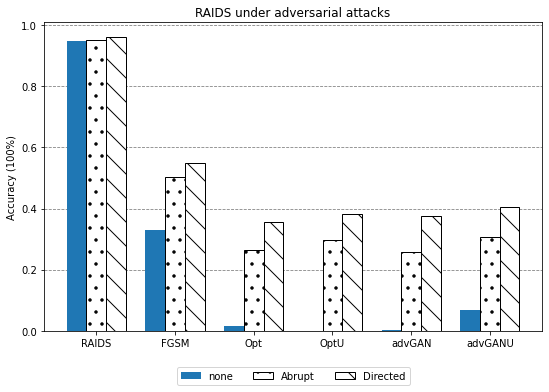

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# ~~~~~~~~~~~~~~~~Overall_Accuracy~~~~~~~~~~~~~~~~
# Abrupt
labels = ["RAIDS", "FGSM", "Opt", "OptU", "advGAN","advGANU"]
abrupt = [0.9506595636732623, 0.5023845763571791,0.26486555048198884, 0.29786910197869104,0.25725520040588534, 0.3055048198883815]
directed = [0.9601217656012176, 0.5502790461694571, 0.35593607305936076, 0.3835109081684424,0.37658548959918825, 0.404439370877727]
none = [0.9464738711314054,0.33102486047691526,0.015347539320142059,0.0007356671740233385,0.002663622526636225,0.06732623033992897]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, none, width, label="none", color="tab:blue")
rects2 = ax.bar(x , abrupt, width, label="Abrupt", color="white", hatch=".", edgecolor="black")
rects3 = ax.bar(x + width, directed, width, label="Directed", color="white", hatch="\\", edgecolor="black")

ax.set_ylabel("Accuracy (100%)")
ax.set_title("RAIDS under adversarial attacks")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

fig.tight_layout()
fig.set_size_inches(8, 6)
plt.show()

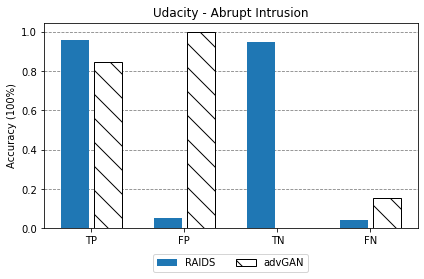

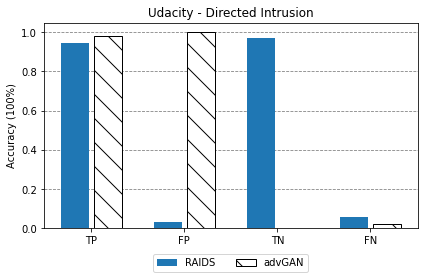

In [7]:
# advGAN
# Abrupt
# TP, FN,TN,FP
labels = ["TP","FP","TN","FN"]
RAIDS = [0.9599154334038055,0.05330675847073745,0.9466932415292626,0.040084566596194506]
attack = [0.8474418604651163,0.9972458778764269,0.0027541221235731113,0.15255813953488373]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, RAIDS, (width - 0.05), label="RAIDS", color="tab:blue")
rects2 = ax.bar(x + width / 2, attack, (width - 0.05), label="advGAN", color="white", hatch="\\", edgecolor="black")

ax.set_ylabel("Accuracy (100%)")
ax.set_title("Udacity - Abrupt Intrusion")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

fig.tight_layout()

plt.show()

# Directed
labels = ["TP","FP","TN","FN"]
RAIDS = [0.9438417780129646,0.029750637807587854,0.9702493621924122,0.05615822198703532]
attack = [0.9800899589892843,0.9995885112336433,0.0004114887663566785,0.019910041010715702]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, RAIDS, (width - 0.05), label="RAIDS", color="tab:blue")
rects2 = ax.bar(x + width / 2, attack, (width - 0.05), label="advGAN", color="white", hatch="\\", edgecolor="black")

ax.set_ylabel("Accuracy (100%)")
ax.set_title("Udacity - Directed Intrusion")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

fig.tight_layout()

plt.show()

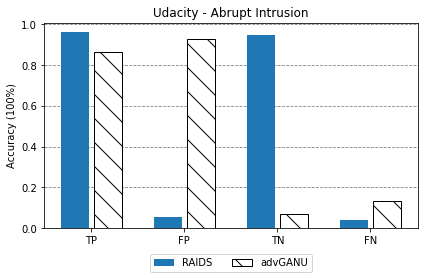

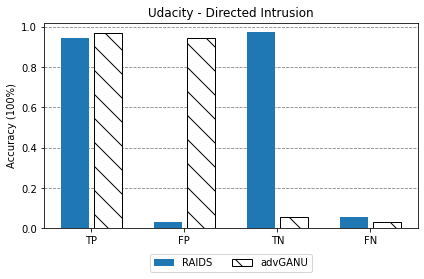

In [8]:
# advGAN Universal
# Abrupt
# TP, FN,TN,FP
labels = ["TP","FP","TN","FN"]
RAIDS = [0.9599154334038055,0.05330675847073745,0.9466932415292626,0.040084566596194506]
attack = [0.8652854122621565,0.9286102554810655,0.0713897445189346,0.13471458773784356]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, RAIDS, (width - 0.05), label="RAIDS", color="tab:blue")
rects2 = ax.bar(x + width / 2, attack, (width - 0.05), label="advGANU", color="white", hatch="\\", edgecolor="black")

ax.set_ylabel("Accuracy (100%)")
ax.set_title("Udacity - Abrupt Intrusion")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

fig.tight_layout()

plt.show()

# Directed
labels = ["TP","FP","TN","FN"]
RAIDS = [0.9450324116946686,0.02880421364496749,0.9711957863550325,0.05496758830533139]
attack = [0.9675883053313931,0.943132252489507,0.056867747510492964,0.03241169466860696]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, RAIDS, (width - 0.05), label="RAIDS", color="tab:blue")
rects2 = ax.bar(x + width / 2, attack, (width - 0.05), label="advGANU", color="white", hatch="\\", edgecolor="black")

ax.set_ylabel("Accuracy (100%)")
ax.set_title("Udacity - Directed Intrusion")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

fig.tight_layout()

plt.show()

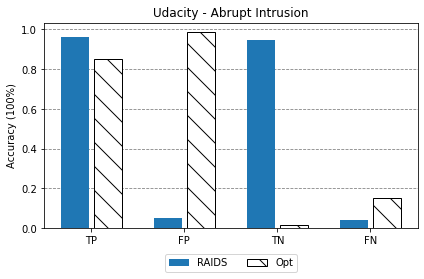

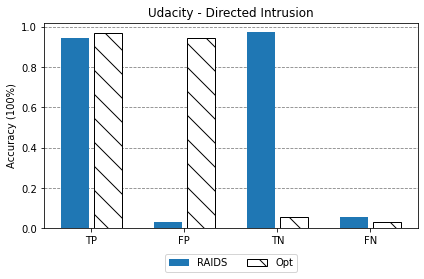

In [4]:
# advGAN Universal
# Abrupt
# TP, FN,TN,FP
labels = ["TP","FP","TN","FN"]
RAIDS = [0.9599154334038055,0.05330675847073745,0.9466932415292626,0.040084566596194506]
attack = [0.850063,0.984599,0.015401,0.149937]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, RAIDS, (width - 0.05), label="RAIDS", color="tab:blue")
rects2 = ax.bar(x + width / 2, attack, (width - 0.05), label="Opt", color="white", hatch="\\", edgecolor="black")

ax.set_ylabel("Accuracy (100%)")
ax.set_title("Udacity - Abrupt Intrusion")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

fig.tight_layout()

plt.show()

# Directed
labels = ["TP","FP","TN","FN"]
RAIDS = [0.9450324116946686,0.02880421364496749,0.9711957863550325,0.05496758830533139]
attack = [0.9675883053313931,0.943132252489507,0.056867747510492964,0.03241169466860696]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, RAIDS, (width - 0.05), label="RAIDS", color="tab:blue")
rects2 = ax.bar(x + width / 2, attack, (width - 0.05), label="Opt", color="white", hatch="\\", edgecolor="black")

ax.set_ylabel("Accuracy (100%)")
ax.set_title("Udacity - Directed Intrusion")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

fig.tight_layout()

plt.show()